# Noise2Void - 2D Example for RGB Data

__Note:__ This notebook expects a trained model and will only work if you have executed the `01_training.ipynb` beforehand.

In [1]:
# We import all our dependencies.
import os
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread, imsave
from csbdeep.io import save_tiff_imagej_compatible

## Load the Network

In [13]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.  
# model_name = 'n2v_HuaweiP20_2_low_intensity'
model_name = 'n2v_arducam_3MP'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [4]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

In [8]:
import rawpy
from PIL import Image

from tqdm import tqdm

def load_image(image_path):
    img = Image.open(image_path)

    # Normalize pixel values to [0, 1]
    img = np.array(img) / 255.0
    
    # Add an extra dimension for consistency (if needed)
    if img.ndim == 3:
        img = img[np.newaxis, ...]

    return img

def load_dng_image(image_path):
  """Loads a custom image, including DNG files, and preprocesses it for training.

  Args:
    image_path: Path to the custom image.

  Returns:
    A numpy array representing the preprocessed image.
  """

  with rawpy.imread(image_path) as raw:
    rgb = raw.postprocess(use_camera_wb=True, half_size=False, output_color=rawpy.ColorSpace.sRGB)

  # Convert to PIL Image for potential further processing
  img = Image.fromarray(rgb)

  # Normalize pixel values to [0, 1]
  img = np.array(img) / 255.0

  # Add an extra dimension for consistency (if needed)
  if img.ndim == 3:
    img = img[np.newaxis, ...]

  return img


## Prediction
Here we will simply use the same image as during training and denoise it using our network.

In [ ]:
# We read the image we want to process and get rid of the Alpha channel.
#img = imread('data/longBeach.png')[...,:3]
path = "C:/Users/janni/Desktop/ETH/BT/Messungen/Huawei P20/lowest/8D_final/images/IMG_20240817_172524.dng"
img = load_custom_image(path)[...,:3]

print(img.shape)

# Here we process the image.
# pred = model.predict(img, axes='SYXC')

(1, 3968, 2976, 3)
The input image is of type float64 and will be casted to float32 for prediction.


In [14]:
# PREDICT ENTIRE FOLDER
input_path = "C:/Users/janni/Desktop/ETH/BT/Messungen/Huawei P20/lowest/8D_final/images"
input_path = "C:/Users/janni/Desktop/ETH/BT/Messungen/Arducam 3MP final/4D"
output_path = input_path + "/N2V"

if not os.path.exists(output_path):
    os.makedirs(output_path)

images = [] 
for filename in tqdm(os.listdir(input_path), desc="Predicting images"):
    if filename.endswith(".dng"):
        img = load_dng_image(os.path.join(input_path, filename))[...,:3]
    elif filename.endswith(".jpg") or filename.endswith(".tiff"):
        img = load_image(os.path.join(input_path, filename))[...,:3]
    else:
        continue
    pred = model.predict(img, axes='SYXC')
    pred_uint8 = (pred[0] * 255).astype(np.uint8)
    
    im = Image.fromarray(pred_uint8)
    im.save(os.path.join(output_path, filename.replace(".dng", ".tiff")))
        

Predicting images:   0%|                                                                        | 0/20 [00:00<?, ?it/s]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 20s 20s/step


Predicting images:  10%|██████▍                                                         | 2/20 [00:20<03:06, 10.35s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 21s 21s/step


Predicting images:  15%|█████████▌                                                      | 3/20 [00:42<04:18, 15.20s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 18s 18s/step


Predicting images:  20%|████████████▊                                                   | 4/20 [01:01<04:24, 16.54s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 18s 18s/step


Predicting images:  25%|████████████████                                                | 5/20 [01:20<04:18, 17.23s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 26s 26s/step


Predicting images:  30%|███████████████████▏                                            | 6/20 [01:46<04:46, 20.45s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 22s 22s/step


Predicting images:  35%|██████████████████████▍                                         | 7/20 [02:09<04:36, 21.27s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 16s 16s/step


Predicting images:  40%|█████████████████████████▌                                      | 8/20 [02:26<03:58, 19.83s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 16s 16s/step


Predicting images:  45%|████████████████████████████▊                                   | 9/20 [02:42<03:25, 18.72s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 15s 15s/step


Predicting images:  50%|███████████████████████████████▌                               | 10/20 [02:58<02:57, 17.72s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 16s 16s/step


Predicting images:  55%|██████████████████████████████████▋                            | 11/20 [03:14<02:34, 17.20s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 16s 16s/step


Predicting images:  60%|█████████████████████████████████████▊                         | 12/20 [03:31<02:16, 17.06s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 15s 15s/step


Predicting images:  65%|████████████████████████████████████████▉                      | 13/20 [03:46<01:55, 16.56s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 15s 15s/step


Predicting images:  70%|████████████████████████████████████████████                   | 14/20 [04:02<01:37, 16.33s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 16s 16s/step


Predicting images:  75%|███████████████████████████████████████████████▎               | 15/20 [04:18<01:22, 16.41s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 16s 16s/step


Predicting images:  80%|██████████████████████████████████████████████████▍            | 16/20 [04:35<01:06, 16.53s/it]

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 16s 16s/step


Predicting images: 100%|███████████████████████████████████████████████████████████████| 20/20 [04:52<00:00, 14.61s/it]


NameError: name 'img' is not defined

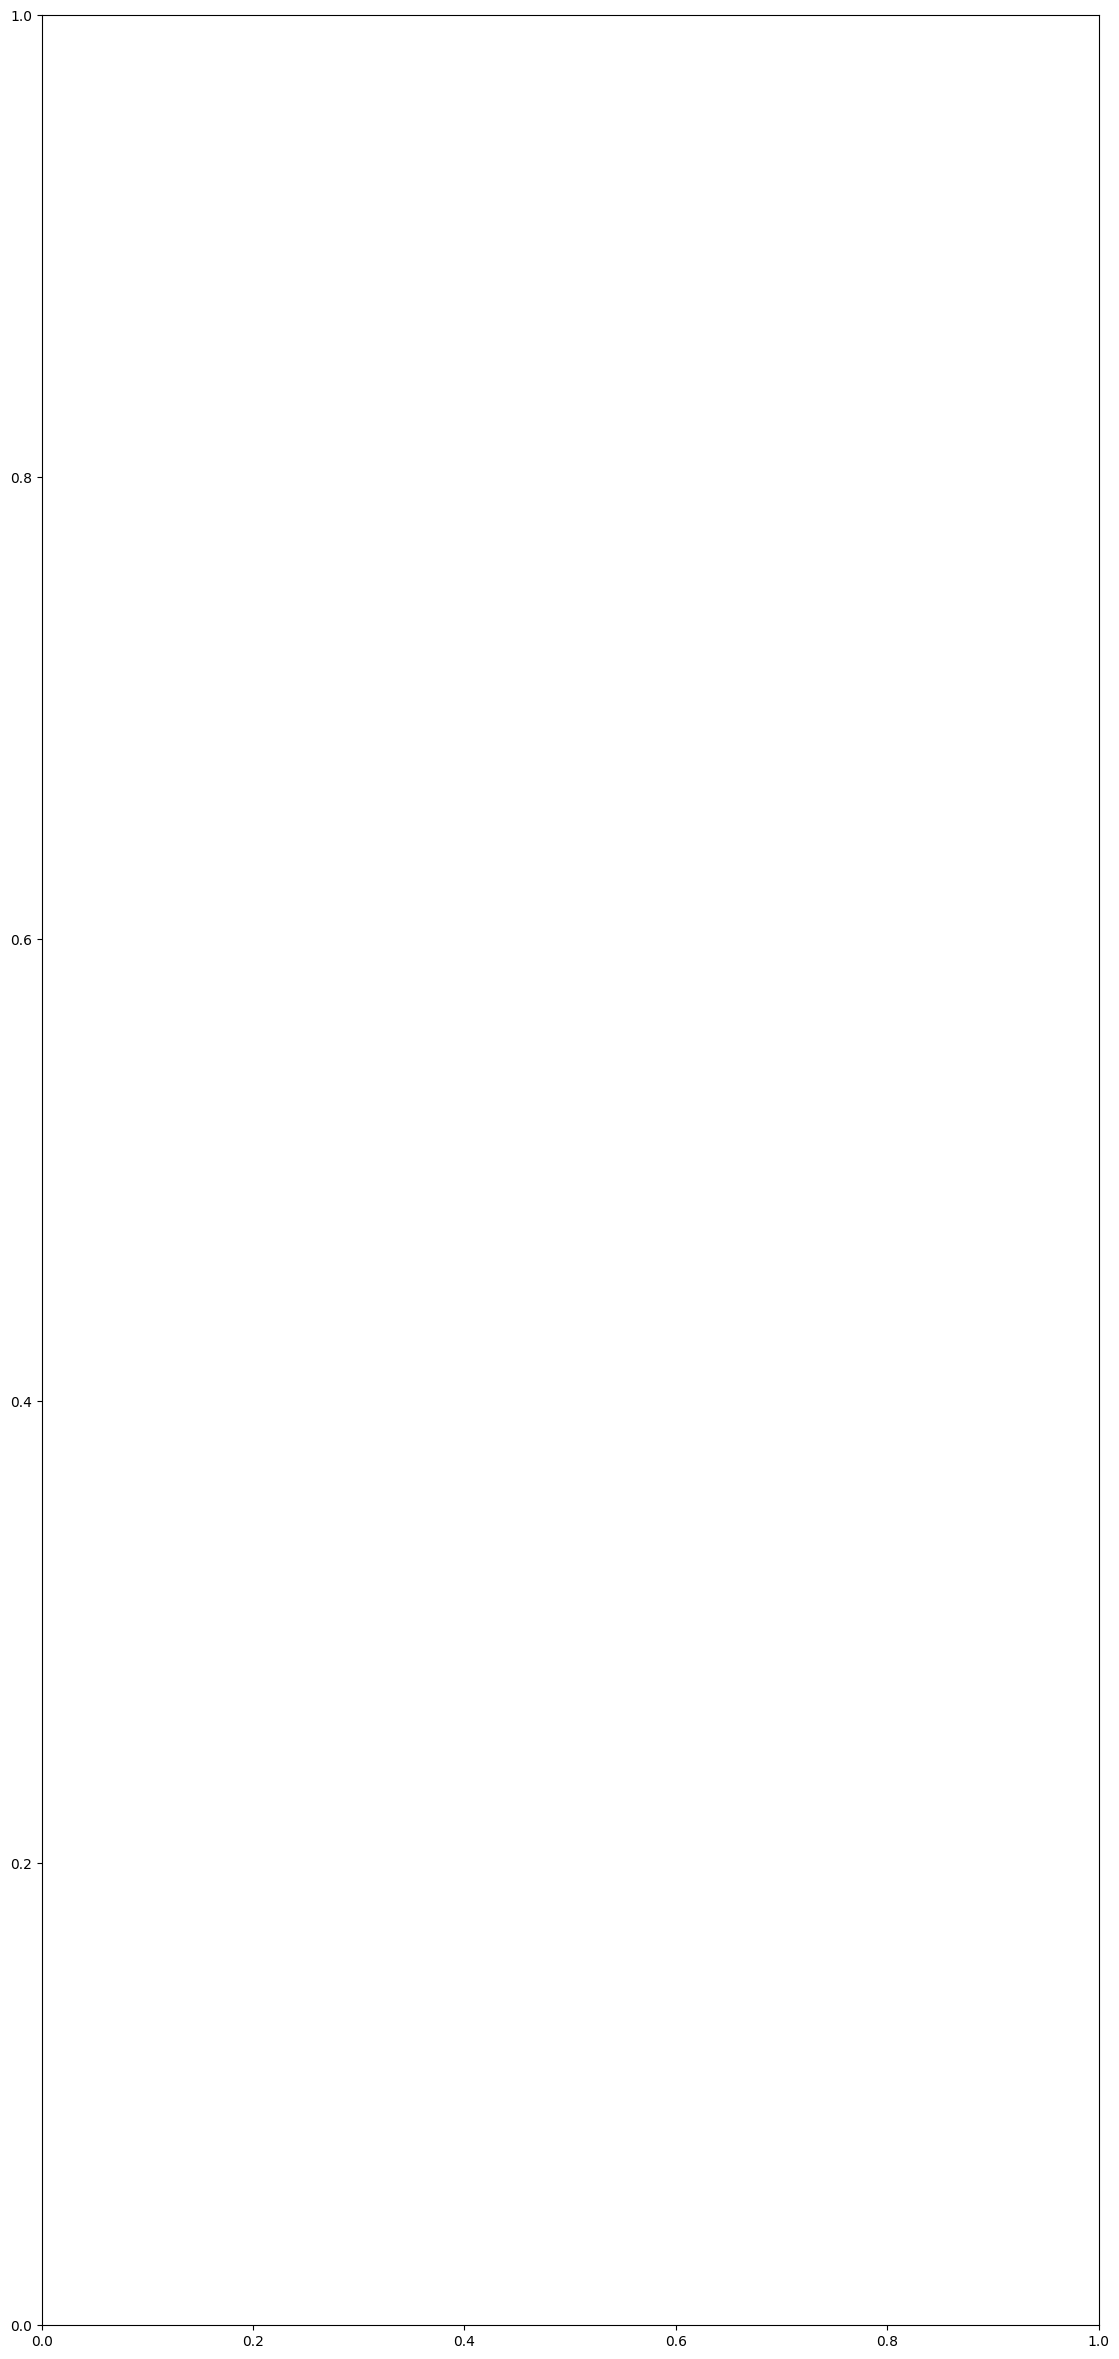

In [7]:
# Let's look at the results.
plt.figure(figsize=(30,30))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow( img[0] )
plt.title('Input')

# and the result.
plt.subplot(1,2,2)
plt.imshow( pred[0] )
plt.title('Prediction');


## Save Results

In [11]:
from matplotlib.image import imsave
imsave('n2v_n0.png', np.clip(pred,0.0,1.0))

In [15]:
print(pred[0].shape)
print(type(pred[0]))

(3968, 2976, 3)
<class 'numpy.ndarray'>


In [17]:
from PIL import Image
output_path = "C:/Users/janni/Downloads/test.tiff"
pred_uint8 = (pred[0] * 255).astype(np.uint8)
im = Image.fromarray(pred_uint8)
im.save(output_path)